<h1> House Prices - Advanced Linear Regression </h1>
Competition and datasets from <a href="https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques"> Kaggle 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Importing relevant scikit-learn packages for linear regression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [51]:
train_df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")


In [52]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<h2> Exploratory Data Analysis </h2>

Looking at relevant columns, dataset sizes, and null values for both training and testing datasets


In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

The "Id" column isn't suitable for fitting the datasets, so we will be dropping them

In [57]:
train_df.drop("Id", axis=1, inplace=True)
test_df.drop("Id", axis=1, inplace=True)

<h3> Deleting the last row in the training dataset will make its size proportionate to the testing dataset

In [60]:
train_df.tail(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [61]:
train_df.drop(1459,axis=0, inplace=True)
train_df.shape

(1459, 80)

<h2> Examining the null values

In [63]:
train_df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [64]:
test_df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [13]:
pd.reset_option('display.max_column')
pd.reset_option('display.max_row')

Both PoolQC, Fence, and MiscFeature columns in the training and testing dataset exceed 1000 rows, so they will be deleted.

In [65]:
train_df.drop(['PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
test_df.drop(['PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

<h2> Removing the null values </h2>

Segregate the numerical column names and categorical column names into different indexes.

In [66]:
num_cols = train_df.select_dtypes(['int64', 'float64']).drop('SalePrice', axis=1).columns
num_cols


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [67]:
cat_cols = train_df.select_dtypes('object').columns
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

<h2> Import LabelEncoder from sklearn to convert object data into categorical data </h2>

LabelEncoder() converts object data into categorical data, and helps in converting the null values into usable categorical values.


In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le = LabelEncoder()

Looping through the data to replace the null values.

We are going to use the median data as the appropriate measure of central tendency to replace the null values in the discrete data because we are going with the assumption that the data is not linear / more skewedly distributed.

For the categorical data, we will be replacing null values with the mode data.

In [70]:
for x in num_cols:
    train_df[x].fillna(train_df[x].median(), inplace=True)
    test_df[x].fillna(test_df[x].median(), inplace=True)

for x in cat_cols:
    train_df[x].fillna(train_df[x].mode(), inplace = True)
    test_df[x].fillna(test_df[x].mode(), inplace = True)
    train_df[x] = le.fit_transform(train_df[x].values)
    test_df[x] = le.fit_transform(test_df[x].values)


In [71]:
train_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [72]:
test_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 76, dtype: int64

<h2> Linear Regression </h2>

Fitting the model

In [73]:
lm = LinearRegression()

In [74]:
X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']

In [75]:
lm.fit(X_train, y_train)

LinearRegression()

In [76]:
X_test = test_df
predictions = lm.predict(X_test)

In [77]:
lm.coef_

array([-1.32017949e+02, -7.97456483e+02, -1.47785662e+02,  3.99523554e-01,
        3.01237326e+04,  5.13690622e+03, -9.29110503e+02,  3.67478386e+03,
       -5.76614544e+04,  1.35208681e+01,  5.91279633e+03,  4.17684415e+02,
       -1.04365060e+03, -9.57083764e+03, -1.98924494e+03, -9.97099379e+02,
        1.13471680e+04,  4.43722830e+03,  2.20850119e+02,  4.84384139e+01,
        2.17831949e+03,  4.51009742e+03, -1.00759603e+03,  3.86493511e+02,
        4.57591377e+03,  3.93502194e+01, -9.24418599e+03,  7.90988855e+02,
        1.52403054e+03, -8.44971685e+03,  2.61245574e+03, -3.62934062e+03,
       -6.48943554e+02,  3.61712740e+00,  8.66103031e+02,  5.43680632e+00,
       -5.06856688e+00,  3.98536685e+00, -2.16155809e+03, -8.92694211e+02,
       -1.67664084e+03, -5.18322999e+02,  2.14301550e+01,  1.64733044e+01,
       -9.59719232e+00,  2.83062672e+01,  7.19457666e+03,  1.11182354e+03,
        4.52757723e+03, -4.34336797e+02, -3.47909813e+03, -1.18507757e+04,
       -8.81749660e+03,  

In [78]:
lm.intercept_

1702022.8337541

<h2> Getting the independent variables for the linear regression equation

In [79]:
test_columns = test_df.columns
print(test_columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [80]:
test_columns.size

76

In [84]:
lm.coef_.shape

(76,)

In [83]:
for x in range(76):
    print(f"The slope for {test_columns[x]} is {lm.coef_[x]}.")

The slope for MSSubClass is -132.01794873510062.
The slope for MSZoning is -797.4564834272115.
The slope for LotFrontage is -147.78566166242547.
The slope for LotArea is 0.39952355438525444.
The slope for Street is 30123.73256705874.
The slope for Alley is 5136.906220788949.
The slope for LotShape is -929.1105032777407.
The slope for LandContour is 3674.7838558274193.
The slope for Utilities is -57661.45441882128.
The slope for LotConfig is 13.520868081121108.
The slope for LandSlope is 5912.796328036576.
The slope for Neighborhood is 417.6844145160631.
The slope for Condition1 is -1043.650601343818.
The slope for Condition2 is -9570.83763575776.
The slope for BldgType is -1989.2449436463744.
The slope for HouseStyle is -997.0993792803785.
The slope for OverallQual is 11347.167983103358.
The slope for OverallCond is 4437.228304334055.
The slope for YearBuilt is 220.8501192848343.
The slope for YearRemodAdd is 48.43841389987773.
The slope for RoofStyle is 2178.3194857372328.
The slope f

In [41]:
lm.coef_[0]

-1.6418106851816368

<h2> Fitting the predictions into our testing dataset's SalePrice

In [88]:
test_df.shape

(1459, 76)

In [91]:
test_df['SalePrice'] = predictions
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,2,80.0,11622,1,0,3,3,0,4,...,0,0,120,0,0,6,2010,8,4,89043.318896
1,20,3,81.0,14267,1,2,0,3,0,0,...,0,0,0,0,12500,6,2010,8,4,149275.942790
2,60,3,74.0,13830,1,2,0,3,0,4,...,0,0,0,0,0,3,2010,8,4,166615.382066
3,60,3,78.0,9978,1,2,0,3,0,4,...,0,0,0,0,0,6,2010,8,4,179282.009456
4,120,3,43.0,5005,1,2,0,1,0,4,...,0,0,144,0,0,1,2010,8,4,189045.868692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,1936,1,2,3,3,0,4,...,0,0,0,0,0,6,2006,8,4,71316.297681
1455,160,4,21.0,1894,1,2,3,3,0,4,...,0,0,0,0,0,4,2006,8,0,60466.968700
1456,20,3,160.0,20000,1,2,3,3,0,4,...,0,0,0,0,0,9,2006,8,0,149465.074447
1457,85,3,62.0,10441,1,2,3,3,0,4,...,0,0,0,0,700,7,2006,8,4,121514.575213


<h2> Visualizing the distribution of the residuals </h2>

If the residuals (observed sale price - predicted sale price) form a normally distributed plot, then the linear regression is a good fit for the data

/Users/justincruzana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


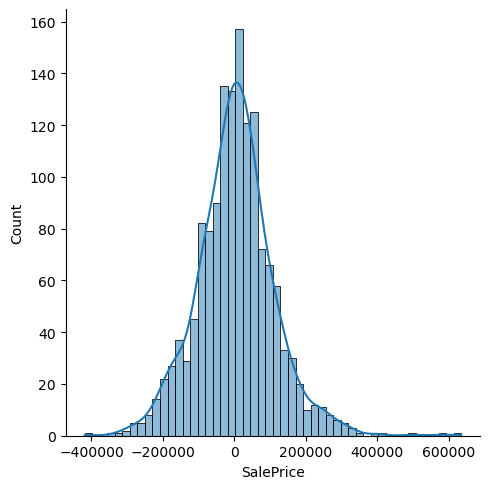

In [94]:
sns.displot(y_train - predictions, kde=True)

<h2> Readying the Submission File

In [96]:
submission_df = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")
submission_df['SalePrice'] = predictions
submission = submission_df[['Id', 'SalePrice']]
submission.head()

,Id,SalePrice
0,1461,89043.318896
1,1462,149275.942790
2,1463,166615.382066
3,1464,179282.009456
4,1465,189045.868692


In [97]:
submission.to_csv('submission.csv', index=False)

End